In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

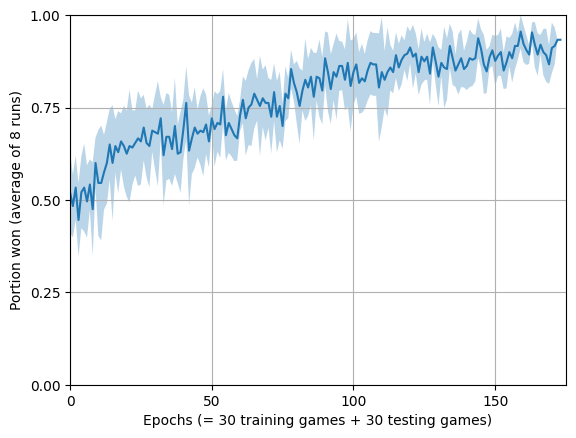

In [39]:
def plot_wins(dir_name: str):
    files = [os.path.join(dir_name, f) for f in os.listdir(dir_name) if f.endswith(".csv")]
    wins_arr = []
    max_len = 0
    for f in files:
        df = pd.read_csv(f)
        subtr = df["games"].to_numpy() - 30
        wins = df[" wins"].to_numpy() - subtr
        wins = wins / 30
        wins_arr += [wins]
        if len(wins) > max_len:
            max_len = len(wins)

    all = np.ones([len(wins_arr), max_len]) * np.nan
    for idx, arr in enumerate(wins_arr):
        all[idx, :len(arr)] = arr
    
    mean = np.nanmean(all, axis=0)
    std = np.nanstd(all, axis=0)
    
    x = np.arange(len(mean))
    plt.plot(np.arange(len(mean)), mean)
    plt.fill_between(x, mean - std, mean + std, alpha=0.3)


plot_wins("./sa_nonatom_results/")
plt.grid()
plt.xlim(0, 175)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 175, 50))
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("Epochs (= 30 training games + 30 testing games)")
plt.ylabel("Portion won (average of 8 runs)")
plt.show()

In [5]:
np.ones(20) * np.nan

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])